# Web Scraping Amazon Reviews with Selenium

This notebook demonstrates how to scrape Amazon product reviews using Selenium WebDriver. The code collects review titles, ratings, and descriptions for specific products from Amazon and saves the data to a CSV file. Below are the details and code blocks for each step.



## 1. Importing Required Libraries

First, we need to import the necessary libraries for web scraping, handling time delays, and logging information.

In [ ]:
# import csv
# import time
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.chrome.options import Options
# import logging
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC


## 2. Setting Up Logging

We set up logging to keep track of the scraping process and record any errors or important events.


In [2]:
# logging.basicConfig(filename='scraping_log.log', level=logging.INFO, format='%(asctime)s - %(message)s')

## 3. Configuring Selenium WebDriver for Headless Mode

To run the web scraping in headless mode (without opening a browser window), we configure Chrome options accordingly.


In [3]:
# chrome_options = Options()
# chrome_options.add_argument("--headless")  # Ensure GUI is off
# chrome_options.add_argument("--no-sandbox")
# chrome_options.add_argument("--disable-dev-shm-usage")

# # Initialize the WebDriver
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)


## 4. Defining the Base URL for Amazon Reviews

We define the base URL for the Amazon product whose reviews we want to scrape. The URL is structured to include pagination.


In [4]:
# base_url = "https://www.amazon.com/Intel-i7-13700-Desktop-Processor-P-cores/product-reviews/B0BQ6BNY56?page="
# https://www.amazon.com/Intel-Core-12th-i5-12500-Processor/product-reviews/B09MSJ29RP?reviewerType=all_reviews&pageNumber=
# https://www.amazon.com/Intel-i7-13700-Desktop-Processor-P-cores/product-reviews/B0BQ6BNY56


## 5. Scraping Reviews from Multiple Pages

We loop through the first two pages of reviews (this can be adjusted as needed) and scrape review titles, ratings, and descriptions.


In [5]:
# element_list = []

# for page in range(1, 3):  # Loop over the first two pages
#     page_url = base_url + str(page)
#     try:
#         driver.get(page_url)
#         logging.info(f"Accessing {page_url}")
        
#         # Adding a small delay to allow the page to load
#         time.sleep(2)
        
#         # Wait explicitly for the elements to load to handle dynamic content
#         WebDriverWait(driver, 10).until(
#             EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".review"))
#         )

#         # Scrape titles, ratings, and descriptions
#         titles = driver.find_elements(By.CSS_SELECTOR, ".review-title-content .a-text-bold")
#         ratings = driver.find_elements(By.CSS_SELECTOR, ".review-rating .a-icon-alt")
#         descriptions = driver.find_elements(By.CSS_SELECTOR, ".review-text-content .a-spacing-small")
        
#         # Calculate the number of reviews to process
#         num_reviews = min(len(titles), len(ratings), len(descriptions))
        
#         for i in range(num_reviews):
#             try:
#                 title_text = titles[i].text if i < len(titles) else 'N/A'
#                 rating_text = ratings[i].text if i < len(ratings) else 'N/A'
#                 description_text = descriptions[i].text if i < len(descriptions) else 'N/A'
#                 element_list.append([title_text, rating_text, description_text])
#             except Exception as e:
#                 logging.error(f"Error processing review {i} on page {page}: {e}")
#     except Exception as e:
#         logging.error(f"Failed to access {page_url}: {e}")

# # Close the driver
# driver.quit()


## 6. Saving Scraped Data to a CSV File

Finally, we save the collected review data to a CSV file for further analysis or processing.


In [6]:
# csv_file = "FILE NAME.csv"
# with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Title", "Rating", "Description"])  # Write the header
#     writer.writerows(element_list)  # Write the data rows

# logging.info(f"Data has been written to {csv_file}")
# print(f"Data has been written to {csv_file}")


In [17]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import logging

# Setup logging
logging.basicConfig(filename='scraping_log.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Setup Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Initialize the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Base URL for Amazon reviews
base_url = "https://www.amazon.com/Intel-Core-12th-i5-12500-Processor/product-reviews/B09MSJ29RP?reviewerType=all_reviews&pageNumber="

# List to hold the result
element_list = []

# Loop over the first two pages
for page in range(1, 3):
    page_url = base_url + str(page)
    try:
        driver.get(page_url)
        logging.info(f"Accessing {page_url}")
        
        # Adding a small delay to avoid rapid requests
        time.sleep(2)
        
        # Scrape titles, ratings, and descriptions
        titles = driver.find_elements(By.CSS_SELECTOR, ".review-title-content")
        ratings = driver.find_elements(By.CSS_SELECTOR, ".review-rating")
        descriptions = driver.find_elements(By.CSS_SELECTOR, ".review-text-content")
        
        # Calculate the number of reviews to process
        num_reviews = min(len(titles), len(ratings), len(descriptions))
        
        for i in range(num_reviews):
            try:
                title_text = titles[i].text if i < len(titles) else 'N/A'
                rating_text = ratings[i].text if i < len(ratings) else 'N/A'
                description_text = descriptions[i].text if i < len(descriptions) else 'N/A'
                element_list.append([title_text, rating_text, description_text])
            except Exception as e:
                logging.error(f"Error processing review {i} on page {page}: {e}")
    except Exception as e:
        logging.error(f"Failed to access {page_url}: {e}")

# Close the driver
driver.quit()

# Save the collected data to a CSV file
csv_file = "amazon_reviewsi5.csv"
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Title", "Rating", "Description"])
    # Write the data rows
    writer.writerows(element_list)

logging.info(f"Data has been written to {csv_file}")
print(f"Data has been written to {csv_file}")


Data has been written to amazon_reviewsi5.csv


In [18]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import logging

# Setup logging
logging.basicConfig(filename='scraping_log.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Setup Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Initialize the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Base URL for Amazon reviews (corrected for pagination)
base_url = "https://www.amazon.com/Intel-i7-13700-Desktop-Processor-P-cores/product-reviews/B0BQ6BNY56?page="

# List to hold the result
element_list = []

# Loop over the first two pages (adjust as needed)
for page in range(1, 3):
    page_url = base_url + str(page)
    try:
        driver.get(page_url)
        logging.info(f"Accessing {page_url}")
        
        # Adding a small delay to allow the page to load
        time.sleep(2)
        
        # Wait explicitly for the elements to load to handle dynamic content
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".review"))
        )

        # Scrape titles, ratings, and descriptions
        titles = driver.find_elements(By.CSS_SELECTOR, ".review-title-content .a-text-bold")
        ratings = driver.find_elements(By.CSS_SELECTOR, ".review-rating .a-icon-alt")
        descriptions = driver.find_elements(By.CSS_SELECTOR, ".review-text-content .a-spacing-small")
        
        # Calculate the number of reviews to process
        num_reviews = min(len(titles), len(ratings), len(descriptions))
        
        for i in range(num_reviews):
            try:
                title_text = titles[i].text if i < len(titles) else 'N/A'
                rating_text = ratings[i].text if i < len(ratings) else 'N/A'
                description_text = descriptions[i].text if i < len(descriptions) else 'N/A'
                element_list.append([title_text, rating_text, description_text])
            except Exception as e:
                logging.error(f"Error processing review {i} on page {page}: {e}")
    except Exception as e:
        logging.error(f"Failed to access {page_url}: {e}")

# Close the driver
driver.quit()

# Save the collected data to a CSV file
csv_file = "amazon_reviews_1713.csv"
with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Title", "Rating", "Description"])
    # Write the data rows
    writer.writerows(element_list)
logging.info(f"Data has been written to {csv_file}")
print(f"Data has been written to {csv_file}")


Data has been written to amazon_reviews_1713.csv


In [1]:
import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import logging

# Setup logging
logging.basicConfig(filename='scraping_log.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Setup Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Initialize the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Base URL for Amazon reviews (corrected for pagination)
base_url = "https://www.amazon.com/Intel-i7-13700-Desktop-Processor-P-cores/product-reviews/B0BQ6BNY56?page="

# List to hold the result
element_list = []

# Loop over the first two pages (adjust as needed)
for page in range(1, 3):
    page_url = base_url + str(page)
    try:
        driver.get(page_url)
        logging.info(f"Accessing {page_url}")
        
        # Adding a small delay to allow the page to load
        time.sleep(2)
        
        # Wait explicitly for the elements to load to handle dynamic content
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".review"))
        )

        # Scrape ratings, titles, and descriptions
        ratings = driver.find_elements(By.CSS_SELECTOR, ".review-rating .a-icon-alt")
        titles = driver.find_elements(By.CSS_SELECTOR, ".review-title-content .a-text-bold")
        descriptions = driver.find_elements(By.CSS_SELECTOR, ".review-text-content .a-spacing-small")
        
        # Debugging: Print the number of elements found
        print(f"Page {page}: Found {len(ratings)} ratings, {len(titles)} titles, and {len(descriptions)} descriptions.")
        logging.info(f"Page {page}: Found {len(ratings)} ratings, {len(titles)} titles, and {len(descriptions)} descriptions.")
        
        # Calculate the number of reviews to process
        num_reviews = min(len(ratings), len(titles), len(descriptions))
        
        for i in range(num_reviews):
            try:
                rating_text = ratings[i].text if i < len(ratings) else 'N/A'
                title_text = titles[i].text if i < len(titles) else 'N/A'
                description_text = descriptions[i].text if i < len(descriptions) else 'N/A'
                element_list.append([rating_text, title_text, description_text])
            except Exception as e:
                logging.error(f"Error processing review {i} on page {page}: {e}")
    except Exception as e:
        logging.error(f"Failed to access {page_url}: {e}")

# Close the driver
driver.quit()

# Check if any data was collected
if element_list:
    # Save the collected data to a CSV file
    csv_file = "amazon_reviews_1713.csv"
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(["Rating", "Title", "Description"])
        # Write the data rows
        writer.writerows(element_list)
    logging.info(f"Data has been written to {csv_file}")
    print(f"Data has been written to {csv_file}")



Page 1: Found 10 ratings, 0 titles, and 0 descriptions.
Page 2: Found 10 ratings, 0 titles, and 0 descriptions.


In [ ]:
import csv
import time
import logging
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup logging
logging.basicConfig(filename='amazon_reviews_log.log', level=logging.INFO, format='%(asctime)s - %(message)s')

# Setup Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  # Ensure GUI is off
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Initialize the WebDriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)

# Base URL for Amazon product reviews
base_url = "https://www.amazon.com/Intel-i7-13700-Desktop-Processor-P-cores/product-reviews/B0BQ6BNY56"

# List to hold the result
element_list = []

try:
    # Access the base URL
    driver.get(base_url)
    logging.info(f"Accessing {base_url}")
    
    # Wait explicitly for the review elements to load
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".review"))
    )
    
    # Find all review containers
    reviews = driver.find_elements(By.CSS_SELECTOR, ".review")
    
    # Loop through each review
    for review in reviews:
        try:
            rating = review.find_element(By.CSS_SELECTOR, ".review-rating span.a-icon-alt").get_attribute("innerHTML").strip().split(' ')[0]
            title = review.find_element(By.CSS_SELECTOR, ".review-title-content .a-text-bold").text.strip()
            description = review.find_element(By.CSS_SELECTOR, ".review-text-content .a-spacing-small").text.strip()
            element_list.append([rating, title, description])
        except Exception as e:
            logging.error(f"Error processing review: {e}")
except Exception as e:
    logging.error(f"Failed to access {base_url}: {e}")

# Close the WebDriver
driver.quit()

# Check if any data was collected
if element_list:
    # Save the collected data to a CSV file
    csv_file = "amazon_reviews_i7_13700.csv"
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Write the header
        writer.writerow(["Rating", "Title", "Description"])
        # Write the data rows
        writer.writerows(element_list)
    logging.info(f"Data has been written to {csv_file}")
    print(f"Data has been written to {csv_file}")



## PREPROCESSING THE DATA



## Step 1: Load the Dataset and Clean Data



In [1]:
import pandas as pd

# Load the CSV file
file_path = 'merged_amazon_reviews.csv'
data = pd.read_csv(file_path)

# Drop the 'Rating' column if it is empty
data_cleaned = data.drop(columns=['Rating'])


## Step 2: Sentiment Analysis with TextBlob

In [3]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'positive'
    elif blob.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'Description' column
data_cleaned['Sentiment'] = data_cleaned['Description'].apply(get_sentiment)


## Step 3: Count Sentiments

In [4]:
sentiment_counts = data_cleaned['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
positive    78
neutral     19
negative    10
Name: count, dtype: int64


## Step 4: Save the Cleaned Data

In [5]:
data_cleaned.to_csv('updated_amazon_reviews.csv', index=False)


## Step 5: Load and Explore the Dataset

In [6]:
import pandas as pd

# Load the dataset
file_path = "updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head(), df.info(), df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        107 non-null    object
 1   Description  107 non-null    object
 2   Sentiment    107 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


(                                               Title  \
 0                                    Excellent Value   
 1         Amazing quad-core processor for the price!   
 2                  Great for what it is designed for   
 3                                      Fast shipping   
 4  This is the PERFECT processor/best value for b...   
 
                                          Description Sentiment  
 0  This is a great processor that can handle just...  positive  
 1  This CPU is incredibly fast and is great for b...  positive  
 2  it's an i3, so don't expect i9 performance. Wi...  positive  
 3        Great product, It's really worth the price.  positive  
 4  How many of you just need a fast processor for...  positive  ,
 None,
             Title                                      Description Sentiment
 count         107                                              107       107
 unique         75                                               77         3
 top     Great CPU

## Step 6: Data Preprocessing

In [8]:
# Data Preprocessing
import re
import langid
from collections import Counter

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

# Apply text cleaning to the Title and Description columns
df['Title_Clean'] = df['Title'].apply(clean_text)
df['Description_Clean'] = df['Description'].apply(clean_text)

# Detect language and filter for English reviews (for simplicity)
df['Language'] = df['Description'].apply(lambda x: langid.classify(x)[0])
df_english = df[df['Language'] == 'en']

# Convert 'Sentiment' column to a categorical type
df_english['Sentiment'] = df_english['Sentiment'].astype('category')

# Display the cleaned dataset and language distribution
df_english.head(), df['Language'].value_counts()


C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\1267226602.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Sentiment'] = df_english['Sentiment'].astype('category')


(                                               Title  \
 0                                    Excellent Value   
 1         Amazing quad-core processor for the price!   
 2                  Great for what it is designed for   
 3                                      Fast shipping   
 4  This is the PERFECT processor/best value for b...   
 
                                          Description Sentiment  \
 0  This is a great processor that can handle just...  positive   
 1  This CPU is incredibly fast and is great for b...  positive   
 2  it's an i3, so don't expect i9 performance. Wi...  positive   
 3        Great product, It's really worth the price.  positive   
 4  How many of you just need a fast processor for...  positive   
 
                                          Title_Clean  \
 0                                    excellent value   
 1           amazing quadcore processor for the price   
 2                  great for what it is designed for   
 3                      

## Step 7: Heuristic for Filtering English Text

In [9]:
# Define a simple heuristic function to filter non-English text based on common English words
def is_english(text):
    common_english_words = ['the', 'is', 'in', 'and', 'to', 'with']
    return any(word in text.lower() for word in common_english_words)

# Apply the heuristic to filter English reviews
df['is_english'] = df['Description'].apply(is_english)
df_english = df[df['is_english']]

# Clean text for English reviews
df_english['Title_Clean'] = df_english['Title'].apply(clean_text)
df_english['Description_Clean'] = df_english['Description'].apply(clean_text)

# Convert 'Sentiment' column to a categorical type
df_english['Sentiment'] = df_english['Sentiment'].astype('category')

# Display the cleaned dataset and the distribution of sentiments
df_english.head(), df_english['Sentiment'].value_counts()


C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\1787931280.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Title_Clean'] = df_english['Title'].apply(clean_text)
C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\1787931280.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Description_Clean'] = df_english['Description'].apply(clean_text)
C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\1787931280.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

(                                               Title  \
 0                                    Excellent Value   
 1         Amazing quad-core processor for the price!   
 2                  Great for what it is designed for   
 3                                      Fast shipping   
 4  This is the PERFECT processor/best value for b...   
 
                                          Description Sentiment  \
 0  This is a great processor that can handle just...  positive   
 1  This CPU is incredibly fast and is great for b...  positive   
 2  it's an i3, so don't expect i9 performance. Wi...  positive   
 3        Great product, It's really worth the price.  positive   
 4  How many of you just need a fast processor for...  positive   
 
                                          Title_Clean  \
 0                                    excellent value   
 1           amazing quadcore processor for the price   
 2                  great for what it is designed for   
 3                      

## Step 8: Redefine the Clean Text Function

In [10]:
# Redefine the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

# Apply the heuristic to filter English reviews
df['is_english'] = df['Description'].apply(is_english)
df_english = df[df['is_english']]

# Clean text for English reviews
df_english['Title_Clean'] = df_english['Title'].apply(clean_text)
df_english['Description_Clean'] = df_english['Description'].apply(clean_text)

# Convert 'Sentiment' column to a categorical type
df_english['Sentiment'] = df_english['Sentiment'].astype('category')

# Display the cleaned dataset and the distribution of sentiments
df_english.head(), df_english['Sentiment'].value_counts()


C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\3664870423.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Title_Clean'] = df_english['Title'].apply(clean_text)
C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\3664870423.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_english['Description_Clean'] = df_english['Description'].apply(clean_text)
C:\Users\rohan\AppData\Local\Temp\ipykernel_12512\3664870423.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

(                                               Title  \
 0                                    Excellent Value   
 1         Amazing quad-core processor for the price!   
 2                  Great for what it is designed for   
 3                                      Fast shipping   
 4  This is the PERFECT processor/best value for b...   
 
                                          Description Sentiment  \
 0  This is a great processor that can handle just...  positive   
 1  This CPU is incredibly fast and is great for b...  positive   
 2  it's an i3, so don't expect i9 performance. Wi...  positive   
 3        Great product, It's really worth the price.  positive   
 4  How many of you just need a fast processor for...  positive   
 
                                          Title_Clean  \
 0                                    excellent value   
 1           amazing quadcore processor for the price   
 2                  great for what it is designed for   
 3                      

## Step 9: Convert Emojis to Text

In [12]:
import pandas as pd
import emoji
import re

# Load the dataset
file_path = "updated_amazon_reviews.csv"
df = pd.read_csv(file_path)

# Function to convert emojis to text descriptions
def convert_emoji_to_text(text):
    # Replace emoji with text
    text = emoji.demojize(text, delimiters=("", ""))
    return text

# Apply the emoji conversion function to the Title and Description columns
df['Title_Emoji_Converted'] = df['Title'].apply(convert_emoji_to_text)
df['Description_Emoji_Converted'] = df['Description'].apply(convert_emoji_to_text)

# Clean the text by removing any redundant underscores used in emoji descriptions
df['Title_Emoji_Converted'] = df['Title_Emoji_Converted'].apply(lambda x: re.sub(r'_+', ' ', x))
df['Description_Emoji_Converted'] = df['Description_Emoji_Converted'].apply(lambda x: re.sub(r'_+', ' ', x))

# Display the cleaned dataset
print(df[['Title', 'Title_Emoji_Converted', 'Description', 'Description_Emoji_Converted']].head())

# Save the modified dataset to a new CSV file
df.to_csv("updated_amazon_reviews_with_emoji_converted.csv", index=False)


                                               Title  \
0                                    Excellent Value   
1         Amazing quad-core processor for the price!   
2                  Great for what it is designed for   
3                                      Fast shipping   
4  This is the PERFECT processor/best value for b...   

                               Title_Emoji_Converted  \
0                                    Excellent Value   
1         Amazing quad-core processor for the price!   
2                  Great for what it is designed for   
3                                      Fast shipping   
4  This is the PERFECT processor/best value for b...   

                                         Description  \
0  This is a great processor that can handle just...   
1  This CPU is incredibly fast and is great for b...   
2  it's an i3, so don't expect i9 performance. Wi...   
3        Great product, It's really worth the price.   
4  How many of you just need a fast processor 

## Step 10: Exploratory Data Analysis (EDA) and Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Title                        107 non-null    object
 1   Description                  107 non-null    object
 2   Sentiment                    107 non-null    object
 3   Title_Emoji_Converted        107 non-null    object
 4   Description_Emoji_Converted  107 non-null    object
dtypes: object(5)
memory usage: 4.3+ KB
None
            Title                                      Description Sentiment  \
count         107                                              107       107   
unique         75                                               77         3   
top     Great CPU  以前使用していた１０世代i9より早いです。　早速ＤＤＲ５　１２８MBにして、稼働させています。  positive   
freq            3                                                2        78   

       Title_Emoji_Converted                      D

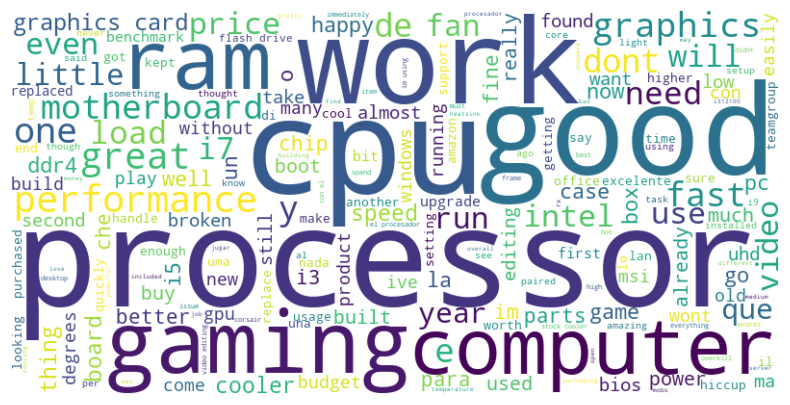

In [21]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
file_path = "updated_amazon_reviews_with_emoji_converted.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.describe(include='all'))

# Clean text data
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    return text

df['Title_Clean'] = df['Title_Emoji_Converted'].apply(clean_text)
df['Description_Clean'] = df['Description_Emoji_Converted'].apply(clean_text)

# Exploratory Data Analysis (EDA)
# Distribution of sentiments
print(df['Sentiment'].value_counts())

# WordCloud for a quick visual analysis of the most common words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Description_Clean']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentiment Analysis (Pre-labeled sentiments available)
# You can use these labels or apply a sentiment model for classification
# Example: Using TF-IDF Vectorizer for text representation
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Description_Clean'])

# Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

# Display the top terms per cluster
# order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names_out()
# for i in range(3):
#     print(f"Cluster {i}:")
#     print([terms[ind] for ind in order_centroids[i, :10]])

# # Save the modified dataset with clusters
# df.to_csv("amazon_reviews_with_clusters.csv", index=False)


# Sentiment Analysis of intel products Amazon Reviews using Random Forest

This section of the notebook demonstrates how to perform sentiment analysis on Amazon reviews using a Random Forest classifier. The process involves loading the dataset, preprocessing the data, training the model, and evaluating its performance.

---

## 1. Importing Required Libraries

We start by importing necessary libraries for data manipulation, machine learning, and evaluation.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 2. Loading and Preprocessing the Dataset

We load the dataset containing Amazon reviews and perform preprocessing steps such as handling missing values and converting text data to numerical features using TF-IDF.


In [16]:
# Load the dataset
file_path = 'updated_amazon_reviews_with_emoji_converted.csv'
data = pd.read_csv(file_path)

# Handle missing values
data = data.dropna(subset=['Description', 'Sentiment'])

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['Description'])

# Encode sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Sentiment'])


## 3. Splitting the Data into Training and Testing Sets

We split the dataset into training and testing sets to evaluate the model's performance on unseen data.


In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Training the Random Forest Classifier

We train a Random Forest classifier on the training data to learn the sentiment classification task.


In [18]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 5. Evaluating the Model

We evaluate the trained model on the test set using accuracy, classification report, and confusion matrix.


In [19]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 95.45%
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.50      0.67         2
     neutral       1.00      1.00      1.00         5
    positive       0.94      1.00      0.97        15

    accuracy                           0.95        22
   macro avg       0.98      0.83      0.88        22
weighted avg       0.96      0.95      0.95        22

Confusion Matrix:
[[ 1  0  1]
 [ 0  5  0]
 [ 0  0 15]]


In [20]:
# import nbformat
# notebook_path = "intel_product_sentiment_analysis.ipynb"
# with open(notebook_path, "r", encoding="utf-8") as file:
#     notebook_content = nbformat.read(file, as_version=4)
# Get an overview of the notebook structure
# notebook_content
